# Projeto RH "CIA-A" Aprendizagem Não Supervisionada: Desvendando os Padrões Ocultos nos Dados

##### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

Este é o projeto RH "CIA-A". 
Todas as informações necessárias estão no Readme deste "GIT"
==============================================================================
O trabalho esta dividido em sete seções:
1. Preparação de dados & Análise Exploratória
2. Agrupamento de K-Means
3. PCA para visualização
4. Agrupamento de K-Means 
5. PCA para visualização 
6. EDA em clusters
7. Faça recomendações

Nosso **Objetivo** e entender melhor os tipos de funcionários buscando desenvolver medidas baseadas em dados para a rentenção dos funcionários dentro de cada um dos segmentos que vamos encontrar dentro da empresa.

Para esta tarefa usaremos ferramentas de  **ML não supervisionadas**, para segmentar os funcionários e fazer recomendações para aumentar retenção.

## 1. Preparação de Dados & Análise Exploratória

In [2]:
dados_funcionarios = pd.read_csv('cia-a.csv')
dados_funcionarios.head()

,funcionario_id,idade,sexo,distancia_casa,nivel_cargo,departamento,salario_mensal,avaliacao_performance,satisfacao_trabalho,desligamento
0,501,44,Feminino,1,2,Comercial,6065,3,4,Sim
1,502,52,Masculino,8,2,Produção e Montagem,5202,4,2,Não
2,504,40,Masculino,2,1,Produção e Montagem,2162,3,3,Sim
3,505,36,Feminino,3,1,Produção e Montagem,2981,3,3,Não
4,507,30,Masculino,2,1,Produção e Montagem,3540,3,2,Não


##### Entendendo os dados:
Base de dados formecida pela empresa consta as seguintes informações:
+ funcionario_id = codigo do funcionário
+ idade = idade do funcionário
+ sexo = sexo do funcionário
+ distancia_casa = distancia de casa
+ nivel_cargo = nivel do cargo dentro da empresa
+ departamento = área em que o funcionário trabalha dentro da empresa
+ salario_mensal = valor so salário mensal do funcionário
+ avaliacao_performance = pontuação atribuido pelo resultado do trabalho
+ satisfacao_trabalho = nota que o funionário atribui a satisfação com o trabalho
+ desligamento = se o funcionário saiu da empresa

In [3]:
# numero de linhas e colunas
dados_funcionarios.shape

(1480, 10)

In [4]:
# vendo os tipos de dados de todas as colunas
dados_funcionarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   funcionario_id         1480 non-null   int64 
 1   idade                  1480 non-null   int64 
 2   sexo                   1480 non-null   object
 3   distancia_casa         1480 non-null   int64 
 4   nivel_cargo            1480 non-null   int64 
 5   departamento           1480 non-null   object
 6   salario_mensal         1480 non-null   int64 
 7   avaliacao_performance  1480 non-null   int64 
 8   satisfacao_trabalho    1480 non-null   int64 
 9   desligamento           1480 non-null   object
dtypes: int64(7), object(3)
memory usage: 115.8+ KB


In [5]:
# verificando as colunas com numeros
dados_funcionarios.dtypes[dados_funcionarios.dtypes == 'int64']

funcionario_id           int64
idade                    int64
distancia_casa           int64
nivel_cargo              int64
salario_mensal           int64
avaliacao_performance    int64
satisfacao_trabalho      int64
dtype: object

In [6]:
# verificando as colunas categoricas
dados_funcionarios.dtypes[dados_funcionarios.dtypes != 'int64']

sexo            object
departamento    object
desligamento    object
dtype: object

OBS: Para fazermos a modelagem, decidimos transformar todas as colunas categoricas em numericas.

In [7]:
# vamos criar uma cópia do DataFrame, para mantermos o original.
data = dados_funcionarios.copy()
data.head()

,funcionario_id,idade,sexo,distancia_casa,nivel_cargo,departamento,salario_mensal,avaliacao_performance,satisfacao_trabalho,desligamento
0,501,44,Feminino,1,2,Comercial,6065,3,4,Sim
1,502,52,Masculino,8,2,Produção e Montagem,5202,4,2,Não
2,504,40,Masculino,2,1,Produção e Montagem,2162,3,3,Sim
3,505,36,Feminino,3,1,Produção e Montagem,2981,3,3,Não
4,507,30,Masculino,2,1,Produção e Montagem,3540,3,2,Não


Iniciamos análises para estas colunas categoricas:

In [8]:
# Verificando os valores referente a coluna "Sexo"
data.sexo.value_counts()

Masculino    887
Feminino     593
Name: sexo, dtype: int64

In [9]:
# mudando a coluna sexo com np.where
data.sexo = np.where(data.sexo == 'Feminino', 1, 0)
data.sexo.head()

0    1
1    0
2    0
3    1
4    0
Name: sexo, dtype: int32

In [10]:
# Verificando os valores referente a coluna "departamento"
data.departamento.value_counts()

Produção e Montagem    962
Comercial              448
Recursos Humanos        65
TI                       5
Name: departamento, dtype: int64

In [11]:
# mudando departamento para numerico usandodo variáveis dummies
# change department to a numeric field via dummy variables
pd.get_dummies(data.departamento).astype('int').head()

,Comercial,Produção e Montagem,Recursos Humanos,TI
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [12]:
# Verificando os valores referente a coluna "Desligamento"
data.desligamento.value_counts()

Não    1239
Sim     241
Name: desligamento, dtype: int64

In [13]:
# mudando a coluna desligamento com np.where
data.desligamento = np.where(data.desligamento == 'Sim', 1, 0)
data.desligamento.head()

0    1
1    0
2    1
3    0
4    0
Name: desligamento, dtype: int32

Uma vez transformados os dados agora vamos juntar com o Dataframe de dummies

In [14]:
# colocando de volta todas as colunas
data1 = data
data = pd.concat([data, pd.get_dummies(data.departamento).astype('int')], axis=1)
data.drop('departamento', axis=1, inplace=True)
data.head()

,funcionario_id,idade,sexo,distancia_casa,nivel_cargo,salario_mensal,avaliacao_performance,satisfacao_trabalho,desligamento,Comercial,Produção e Montagem,Recursos Humanos,TI
0,501,44,1,1,2,6065,3,4,1,1,0,0,0
1,502,52,0,8,2,5202,4,2,0,0,1,0,0
2,504,40,0,2,1,2162,3,3,1,0,1,0,0
3,505,36,1,3,1,2981,3,3,0,0,1,0,0
4,507,30,0,2,1,3540,3,2,0,0,1,0,0


In [15]:
data.shape

(1480, 13)

Nosso objetivo é encontrar os diferentes tipos de funcionários na empresa e analisar sua rotatividade (se eles acabam saindo ou não).

### Qual é a rotatividade geral de todos os funcionários nos dados, ou seja, qual é a porcentagem de funcionários que deixam a empresa?

In [16]:
data.desligamento.mean() 

0.16283783783783784

#### Temos aproximadamente  16% de taxa de desligamento.

#### abaixo podemos ver um resumo da média da coluna "desligamento" de funcionários que permanecem vs. saem - quais são suas conclusões?

In [17]:
data.groupby('desligamento').mean()

,funcionario_id,idade,sexo,distancia_casa,nivel_cargo,salario_mensal,avaliacao_performance,satisfacao_trabalho,Comercial,Produção e Montagem,Recursos Humanos,TI
desligamento,,,,,,,,,,,,
0,1522.740113,40.554479,0.406780,8.892655,2.146893,6898.043584,3.156578,2.781275,0.287328,0.669088,0.042776,0.000807
1,1493.784232,36.639004,0.369295,10.580913,1.647303,4860.551867,3.149378,2.481328,0.381743,0.551867,0.049793,0.016598


**PRIMEIRAS CONCLUSÕES**: As pessoas que ficam tendem a ser mais velhas, mulheres, moram perto, são mais experientes, estão satisfeitas com seus empregos e trabalham em produção e montagem

#### Removendo as colunas funcionario_id e desligamento

In [18]:
# criando um novo dataframe sem a coluna de atrito para modelarmos
df = data # vamos preservar tb o DataFrame data
df.head()


,funcionario_id,idade,sexo,distancia_casa,nivel_cargo,salario_mensal,avaliacao_performance,satisfacao_trabalho,desligamento,Comercial,Produção e Montagem,Recursos Humanos,TI
0,501,44,1,1,2,6065,3,4,1,1,0,0,0
1,502,52,0,8,2,5202,4,2,0,0,1,0,0
2,504,40,0,2,1,2162,3,3,1,0,1,0,0
3,505,36,1,3,1,2981,3,3,0,0,1,0,0
4,507,30,0,2,1,3540,3,2,0,0,1,0,0


In [19]:
df.drop(columns=['funcionario_id', 'desligamento'], inplace=True)
df.head() 

,idade,sexo,distancia_casa,nivel_cargo,salario_mensal,avaliacao_performance,satisfacao_trabalho,Comercial,Produção e Montagem,Recursos Humanos,TI
0,44,1,1,2,6065,3,4,1,0,0,0
1,52,0,8,2,5202,4,2,0,1,0,0
2,40,0,2,1,2162,3,3,0,1,0,0
3,36,1,3,1,2981,3,3,0,1,0,0
4,30,0,2,1,3540,3,2,0,1,0,0


In [20]:
df.shape

(1480, 11)

#### Vamos criar um gráfico de pares comparando todas as colunas do dataframe

In [21]:
#sns.pairplot(df);

**OBSERVAÇÕES**:
* Idade e gênero parecem estar distribuídos de forma bastante uniforme
* Mais pessoas moram mais perto do escritório
* Nível de trabalho e renda estão correlacionados
* Há menos pessoas de alto desempenho
* A maioria das pessoas está feliz com os empregos
* Há poucas pessoas em RH em comparação com os outros departamentos

## 2. K-Means Clustering - Técnica 1

usaremos K-means para segmentar os funcionários e iniciar comparações mais relevantes

### Padronizar os dados

In [22]:
# dimensionar os dados usando padronização

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,idade,sexo,distancia_casa,nivel_cargo,salario_mensal,avaliacao_performance,satisfacao_trabalho,Comercial,Produção e Montagem,Recursos Humanos,TI
0,0.447675,1.223023,-1.010114,-0.059288,-0.106789,-0.420383,1.150011,1.517752,-1.362770,-0.214328,-0.058222
1,1.324802,-0.817646,-0.144397,-0.059288,-0.290642,2.284692,-0.664505,-0.658869,0.733799,-0.214328,-0.058222
2,0.009112,-0.817646,-0.886440,-0.963883,-0.938284,-0.420383,0.242753,-0.658869,0.733799,-0.214328,-0.058222
3,-0.429451,1.223023,-0.762766,-0.963883,-0.763804,-0.420383,0.242753,-0.658869,0.733799,-0.214328,-0.058222
4,-1.087296,-0.817646,-0.886440,-0.963883,-0.644715,-0.420383,-0.664505,-0.658869,0.733799,-0.214328,-0.058222


In [23]:
# verifique novamente se todas as médias das colunas são 0 e os desvios padrão são 1
df_scaled.describe()

,idade,sexo,distancia_casa,nivel_cargo,salario_mensal,avaliacao_performance,satisfacao_trabalho,Comercial,Produção e Montagem,Recursos Humanos,TI
count,1.480000e+03,1.480000e+03,1.480000e+03,1.480000e+03,1.480000e+03,1.480000e+03,1.480000e+03,1.480000e+03,1.480000e+03,1.480000e+03,1.480000e+03
mean,-1.632328e-16,-4.680940e-17,-4.800964e-17,-1.512304e-16,4.080820e-17,3.948793e-16,1.584318e-16,-4.560916e-17,-9.121832e-17,-8.161640e-17,1.440289e-17
std,1.000338e+00,1.000338e+00,1.000338e+00,1.000338e+00,1.000338e+00,1.000338e+00,1.000338e+00,1.000338e+00,1.000338e+00,1.000338e+00,1.000338e+00
min,-2.074063e+00,-8.176464e-01,-1.010114e+00,-9.638833e-01,-1.168580e+00,-3.125458e+00,-1.571763e+00,-6.588691e-01,-1.362770e+00,-2.143278e-01,-5.822225e-02
25%,-7.583736e-01,-8.176464e-01,-8.864398e-01,-9.638833e-01,-7.597030e-01,-4.203833e-01,-6.645052e-01,-6.588691e-01,-1.362770e+00,-2.143278e-01,-5.822225e-02
50%,-1.005288e-01,-8.176464e-01,-2.680712e-01,-5.928769e-02,-3.355938e-01,-4.203833e-01,2.427528e-01,-6.588691e-01,7.337994e-01,-2.143278e-01,-5.822225e-02
75%,6.669569e-01,1.223023e+00,5.976449e-01,8.453079e-01,3.904994e-01,-4.203833e-01,1.150011e+00,1.517752e+00,7.337994e-01,-2.143278e-01,-5.822225e-02
max,2.530851e+00,1.223023e+00,2.452751e+00,2.654499e+00,2.877048e+00,4.989767e+00,2.057269e+00,1.517752e+00,7.337994e-01,4.665751e+00,1.717556e+01


In [24]:
### Vamos escrever um loop para ajustar modelos com 2 a 15 clusters e registre as pontuações de inércia e silhueta
# criando uma lista vazia para conter muitos valores de inércia e silhueta
inertia_values = []
silhouette_scores = []

# criando de 2 a 15 clusters e adicionando as pontuações de inércia e as pontuações de silhueta às listas
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42) # changed from auto to 10
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_, metric='euclidean', sample_size=None))

c:\Users\dsant\anaconda3\envs\python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\dsant\anaconda3\envs\python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


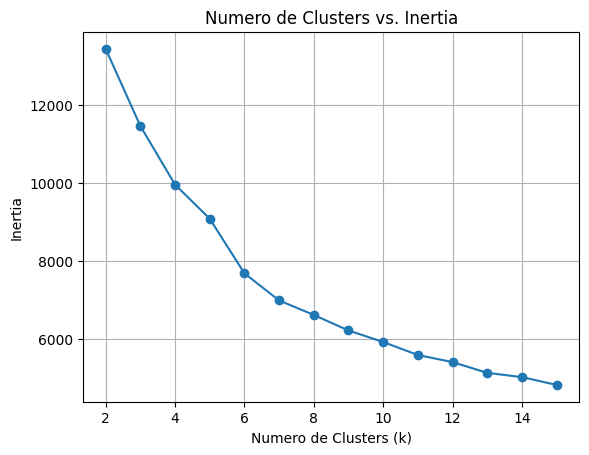

In [25]:
# plotando os valores de inércia

# transformando a lista em uma série para plotagem
inertia_series = pd.Series(inertia_values, index=range(2, 16))

# plotando os dados
inertia_series.plot(marker='o')
plt.xlabel("Numero de Clusters (k)")
plt.ylabel("Inertia")
plt.title("Numero de Clusters vs. Inertia")
plt.grid(True)  # Opcional: Adiciona uma grade ao gráfico
plt.show()

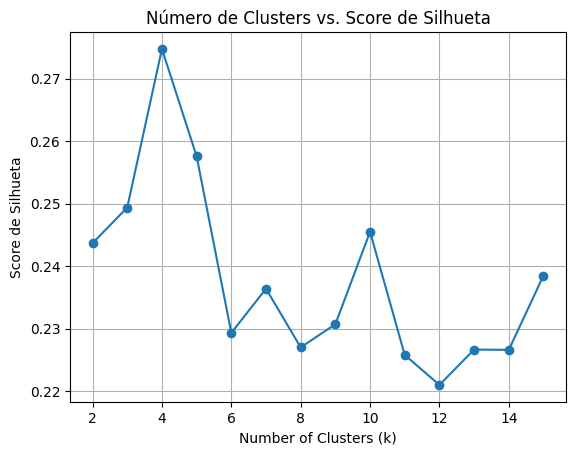

In [26]:
# plot the silhouette scores

# Transformando a lista em uma série para plotagem
silhouette_series = pd.Series(silhouette_scores, index=range(2, 16))

# Plotando os dados
silhouette_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score de Silhueta")
plt.title("Número de Clusters vs. Score de Silhueta");
plt.grid(True)  # Opcional: Adiciona uma grade ao gráfico
plt.show()

### Identificando um valor k que se pareça com um cotovelo no gráfico de inércia e tenha uma pontuação de silhueta alta

In [27]:
# Ajustando um modelo k-means para o valor de k=4 que que é a maior slilueta
kmeans4 = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans4.fit(df_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [28]:
# encontrando o número de funcionários em cada cluster

Counter(kmeans4.labels_)

Counter({0: 748, 2: 413, 1: 254, 3: 65})

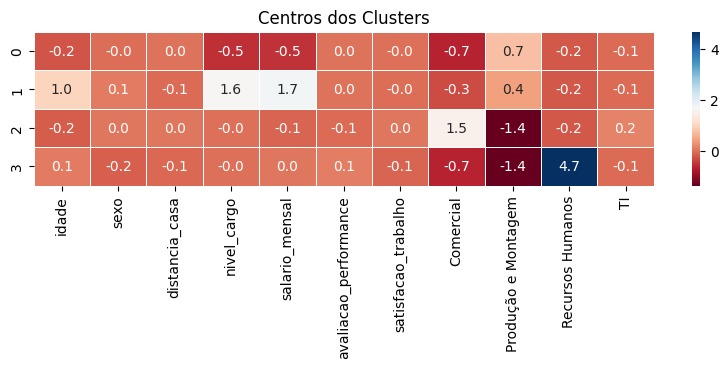

In [29]:
# Criar um DataFrame com os centros dos clusters
cluster_centers4 = pd.DataFrame(kmeans4.cluster_centers_, columns=df_scaled.columns)

# Plotar o heatmap
plt.figure(figsize=(10, 2))
sns.heatmap(cluster_centers4, annot=True, cmap="RdBu", fmt=".1f", linewidths=.5)
plt.title('Centros dos Clusters')
plt.show()

Os clusters:
* Cluster 0: funcionários juniores, de Produção e Montagem
* Cluster 1: funcionários seniores
* Cluster 2: funcionários do Comercial e TI
* Cluster 3: funcionários de RH


## PCA - Técnica 2
### Modelo PCA com 2 componentes para visualização

In [30]:
# ajuste um modelo PCA com 2 componentes

pca = PCA(n_components=2)
pca.fit(df_scaled)


PCA(n_components=2)

In [31]:
# ver a razão de variância explicada
pca.explained_variance_ratio_

array([0.21581368, 0.17124097])

In [32]:
# Variância explicada pelos componentes principais
explained_variance_ratio = np.array([0.21581368, 0.17124097])

# Total da variância explicada
total_variance_explained = np.sum(explained_variance_ratio)
print("Total da Variância Explicada:", total_variance_explained)


Total da Variância Explicada: 0.38705465


é uma variancia baixa. No seu caso, somando os dois valores, a variância total explicada pelos dois primeiros componentes é aproximadamente 38.70%.

In [33]:
# ver os componentes
pca.components_

array([[ 0.43516221,  0.0486628 , -0.00263977,  0.60664916,  0.5963951 ,
        -0.01573887, -0.00540481,  0.20119629, -0.2067421 ,  0.03183219,
        -0.006003  ],
       [ 0.21040048, -0.00865336, -0.01273188,  0.13751508,  0.17046116,
         0.04403645, -0.01247777, -0.65274542,  0.68195072, -0.1119836 ,
        -0.04193624]])

In [34]:
# ver as colunas
df_scaled.columns

Index(['idade', 'sexo', 'distancia_casa', 'nivel_cargo', 'salario_mensal',
       'avaliacao_performance', 'satisfacao_trabalho', 'Comercial',
       'Produção e Montagem', 'Recursos Humanos', 'TI'],
      dtype='object')

Os componentes:
* Componente 1: idade mais alta, nível cargo, renda mensal = mais sênior
* Componente 2: menor = Comercial, maior = Produção e Montagem

# PCA

## Fit a PCA Model with 2 components for visualization

In [35]:
# ajuste um modelo PCA com 2 componentes

pca = PCA(n_components=2)
pca.fit(df_scaled)

PCA(n_components=2)

In [36]:
# veja a razão de variância explicada
pca.explained_variance_ratio_

array([0.21581368, 0.17124097])

In [37]:
# visualizar os componentes
pca.components_

array([[ 0.43516221,  0.0486628 , -0.00263977,  0.60664916,  0.5963951 ,
        -0.01573887, -0.00540481,  0.20119629, -0.2067421 ,  0.03183219,
        -0.006003  ],
       [ 0.21040048, -0.00865336, -0.01273188,  0.13751508,  0.17046116,
         0.04403645, -0.01247777, -0.65274542,  0.68195072, -0.1119836 ,
        -0.04193624]])

In [38]:
# visualizar as colunas
df_scaled.columns

Index(['idade', 'sexo', 'distancia_casa', 'nivel_cargo', 'salario_mensal',
       'avaliacao_performance', 'satisfacao_trabalho', 'Comercial',
       'Produção e Montagem', 'Recursos Humanos', 'TI'],
      dtype='object')

Interprete os componentes:
* Componente 1: idade mais alta, nível de cargo, renda mensal = mais sênior
* Componente 2: menor = Produção e Montagem, maior = Recursos Humanos

## Sobrepor os cluster K-Means

In [39]:
df_scaled_transformed = pd.DataFrame(pca.transform(df_scaled), columns=['PC1', 'PC2'])
df_scaled_transformed.head()

,PC1,PC2
0,0.738374,-1.856355
1,0.004682,1.295789
2,-1.463248,0.663180
3,-1.451058,0.581414
4,-1.760377,0.493857


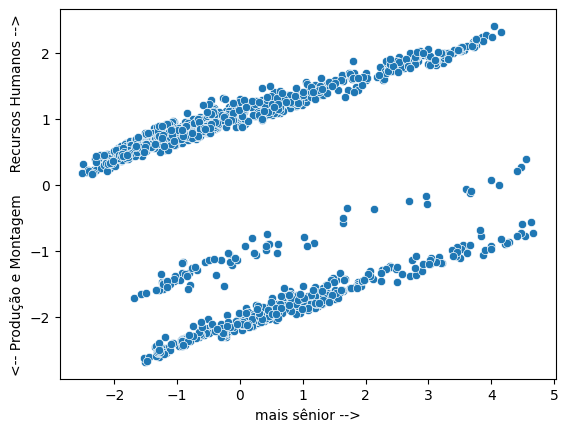

In [40]:
# plotar os dados

sns.scatterplot(x='PC1', y='PC2', data=df_scaled_transformed)
plt.xlabel('mais sênior -->')
plt.ylabel('<-- Produção e Montagem     Recursos Humanos -->')
plt.show()

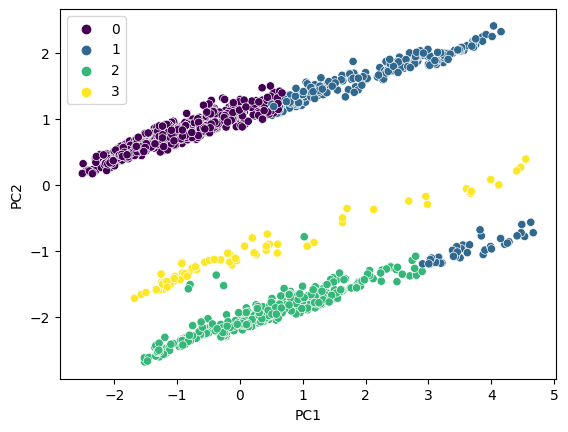

In [41]:
# sobreponha os clusters kmeans (dica: defina o matiz para serem os rótulos do cluster)
sns.scatterplot(x='PC1',
                y='PC2',
                data=df_scaled_transformed, hue=kmeans4.labels_, palette='viridis')
plt.show()

In [42]:
dados_funcionarios.head()

,funcionario_id,idade,sexo,distancia_casa,nivel_cargo,departamento,salario_mensal,avaliacao_performance,satisfacao_trabalho,desligamento
0,501,44,Feminino,1,2,Comercial,6065,3,4,Sim
1,502,52,Masculino,8,2,Produção e Montagem,5202,4,2,Não
2,504,40,Masculino,2,1,Produção e Montagem,2162,3,3,Sim
3,505,36,Feminino,3,1,Produção e Montagem,2981,3,3,Não
4,507,30,Masculino,2,1,Produção e Montagem,3540,3,2,Não


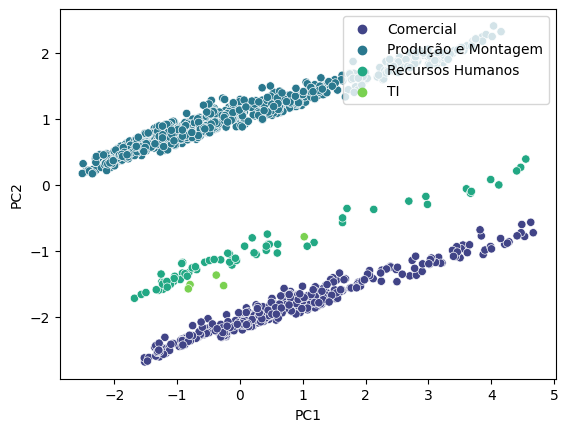

In [43]:
### Sobreponha as cores do Departamento
sns.scatterplot(x='PC1',
                y='PC2',
                data=df_scaled_transformed, hue=dados_funcionarios.departamento, palette='viridis')

plt.legend(loc='upper right');
plt.show()

## K-Means Clustering: Round 2

Como os departamentos parecem dominar a visualização, vamos excluí-los e tentar ajustar mais modelos K-Means.

In [44]:
# novo dataframe que exclua as três colunas de departamento do dataframe dimensionado

df_scaled_v2 = df_scaled.iloc[:, :7]
df_scaled_v2.head()

,idade,sexo,distancia_casa,nivel_cargo,salario_mensal,avaliacao_performance,satisfacao_trabalho
0,0.447675,1.223023,-1.010114,-0.059288,-0.106789,-0.420383,1.150011
1,1.324802,-0.817646,-0.144397,-0.059288,-0.290642,2.284692,-0.664505
2,0.009112,-0.817646,-0.886440,-0.963883,-0.938284,-0.420383,0.242753
3,-0.429451,1.223023,-0.762766,-0.963883,-0.763804,-0.420383,0.242753
4,-1.087296,-0.817646,-0.886440,-0.963883,-0.644715,-0.420383,-0.664505


## vemos repetir o loop para ajustar modelos com 2 a 15 clusters e registre as pontuações de inércia e silhueta

In [45]:
# loop para ajustar modelos com 2 a 15 clusters

# criada uma lista vazia para conter muitos valores de inércia e silhueta
inertia_values_v2 = []
silhouette_scores_v2 = []

# criado 2 a 15 clusters e adicione as pontuações de inércia e as pontuações de silhueta às listas
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42) # changed from auto to 10
    kmeans.fit(df_scaled_v2)
    inertia_values_v2.append(kmeans.inertia_)
    silhouette_scores_v2.append(silhouette_score(df_scaled_v2, kmeans.labels_, metric='euclidean', sample_size=None))

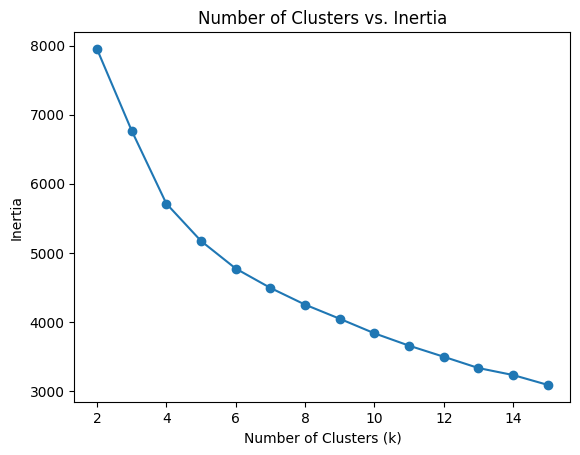

In [46]:
# plotar os valores de inércia

# transformar a lista em uma série para plotagem
inertia_series_v2 = pd.Series(inertia_values_v2, index=range(2, 16))

# plotar os dados
inertia_series_v2.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

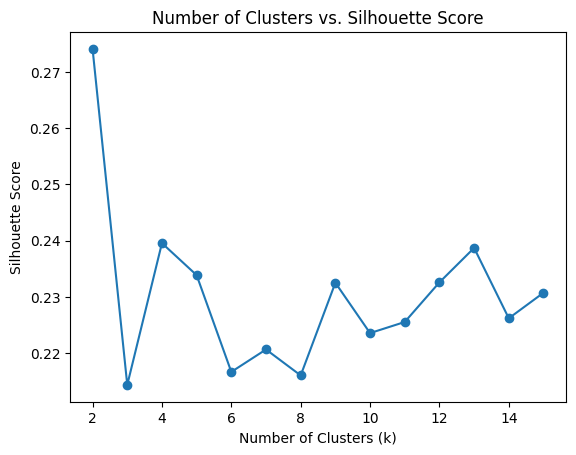

In [47]:
# plotar as pontuações da silhueta

# transformar a lista em uma série para plotagem
silhouette_series_v2 = pd.Series(silhouette_scores_v2, index=range(2, 16))

# plotar os dados
silhouette_series_v2.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score");

### Identifique alguns valores k que se parecem com um cotovelo no gráfico de inércia e têm uma pontuação de silhueta alta

vamos testar k=3 como base nos dois gráficos

In [48]:
# ajuste do modelo kmeans para o valor k=3
kmeans3_v2 = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans3_v2.fit(df_scaled_v2)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [49]:
# o número de funcionários em cada cluster
Counter(kmeans3_v2.labels_)

Counter({1: 731, 0: 484, 2: 265})

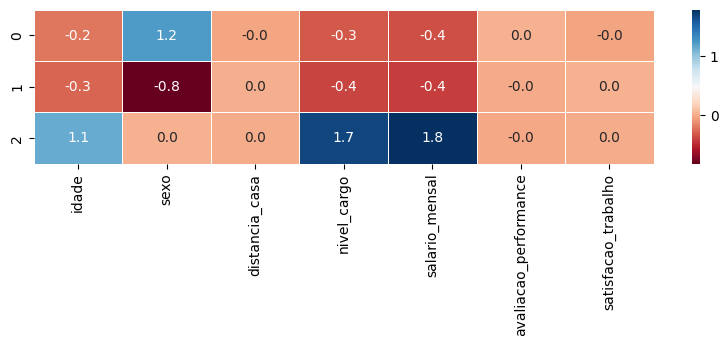

In [50]:
# criado o mapa de calor dos centros do cluster
cluster_centers3_v2 = pd.DataFrame(kmeans3_v2.cluster_centers_, columns=df_scaled_v2.columns)

plt.figure(figsize=(10, 2))
sns.heatmap(cluster_centers3_v2, annot=True, cmap="RdBu", fmt=".1f", linewidths=.5);

O que os clusters dizem:
* Cluster 0: funcionários juniores, sexo feminino
* Cluster 1: funcionários juniores,  sexo masculino 
* Cluster 2: funcionários seniores

vamos testar k=4 como base nos dois gráficos

In [51]:
# ajuste um modelo kmeans para o valor k=4 que você identificou
kmeans4_v2 = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans4_v2.fit(df_scaled_v2)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [52]:
# encontre o número de funcionários em cada cluster
Counter(kmeans4_v2.labels_)

Counter({3: 620, 1: 407, 0: 249, 2: 204})

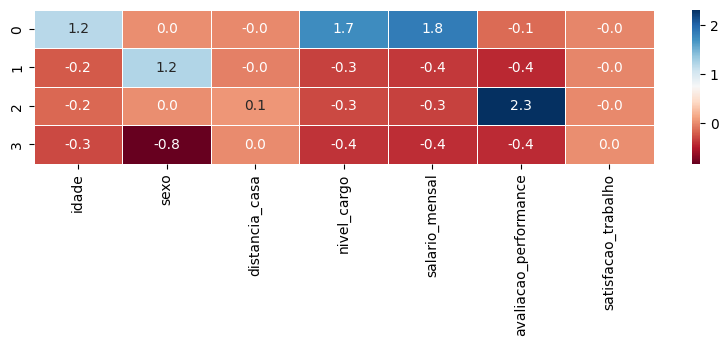

In [53]:
# crie um mapa de calor dos centros do cluster
cluster_centers4_v2 = pd.DataFrame(kmeans4_v2.cluster_centers_, columns=df_scaled_v2.columns)

plt.figure(figsize=(10, 2))
sns.heatmap(cluster_centers4_v2, annot=True, cmap="RdBu", fmt=".1f", linewidths=.5)
plt.show()

O que os clusters dizem:
* Cluster 0: Profissionais Experientes e Satisfeitos
* Cluster 1: Novos Talentos Femininos
* Cluster 2: funcionários de alto desempenho
* Cluster 3: Novos Talentos Masculinos

Vamos aumentar a quantidade de clusters para ver o que acontece

In [54]:
# modelo kmeans para o valor k=6
kmeans6_v2 = KMeans(n_clusters=6, n_init=10, random_state=42)
kmeans6_v2.fit(df_scaled_v2)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [55]:
# número de funcionários em cada cluster
Counter(kmeans6_v2.labels_)

Counter({1: 351, 0: 308, 4: 219, 2: 204, 3: 201, 5: 197})

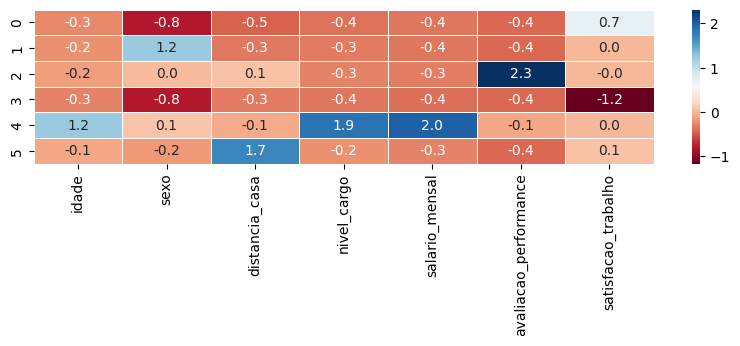

In [56]:
# mapa de calor dos centros do cluster
cluster_centers6_v2 = pd.DataFrame(kmeans6_v2.cluster_centers_, columns=df_scaled_v2.columns)

plt.figure(figsize=(10, 2))
sns.heatmap(cluster_centers6_v2, annot=True, cmap="RdBu", fmt=".1f", linewidths=.5);

O que os clusters dizem:
* Cluster 0: homens que gostam de seus empregos
* Cluster 1: mulheres iniciando a carreira
* Cluster 2: profissionais de alto desempenho
* Cluster 3: homens que não gostam de seus empregos
* Cluster 4: funcionários seniores
* Cluster 5: pessoas que fazem longos trajetos

# PCA: Round 2
Vamos visualizar os dados (sem departamentos) usando PCA.

In [57]:
# ajuste um modelo PCA com 2 componentes

pca_v2 = PCA(n_components=2)
pca_v2.fit(df_scaled_v2)

PCA(n_components=2)

In [58]:
# veja a razão de variância explicada
pca_v2.explained_variance_ratio_ # é mais alto do que antes

array([0.33314749, 0.14820879])

In [59]:
# visualizar os componentes
pca_v2.components_

array([[ 0.47166153,  0.04609069, -0.00541957,  0.62383505,  0.6213674 ,
        -0.00771788, -0.00738185],
       [ 0.01895937,  0.60414238,  0.38697326, -0.02327976, -0.03213255,
         0.49400407, -0.48917252]])

In [60]:
# visualizar as colunas
df_scaled_v2.columns

Index(['idade', 'sexo', 'distancia_casa', 'nivel_cargo', 'salario_mensal',
       'avaliacao_performance', 'satisfacao_trabalho'],
      dtype='object')

Interprete os componentes:
* Componente 1: idade mais avançada, nível de trabalho, renda mensal = mais sênior
* Componente 2: <-- feliz no trabalho | mulheres, deslocamento mais longo, desempenho mais alto -->

## Sobrepor as cores do cluster K-Means

In [61]:
# transforme os dados
df_scaled_transformed_v2 = pd.DataFrame(pca_v2.transform(df_scaled_v2), columns=['PC1', 'PC2'])
df_scaled_transformed_v2.head()

,PC1,PC2
0,0.164410,-0.408933
1,0.357646,0.939689
2,-1.211455,-1.110661
3,-1.216506,0.156130
4,-1.539477,-0.697076


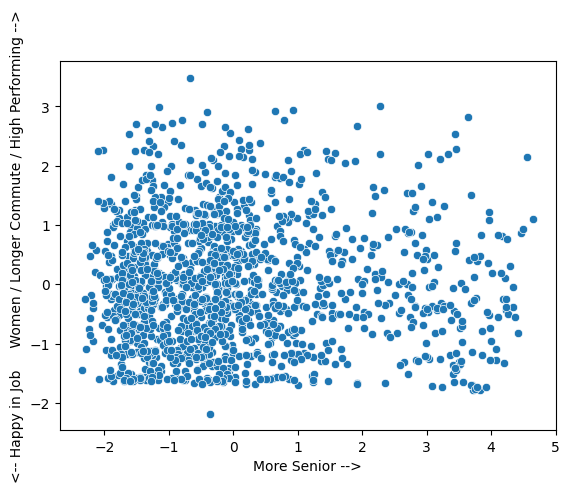

In [62]:
# plotar os dados

sns.scatterplot(x='PC1', y='PC2', data=df_scaled_transformed_v2)
plt.xlabel('More Senior -->')
plt.ylabel('<-- Happy in Job     Women / Longer Commute / High Performing -->');

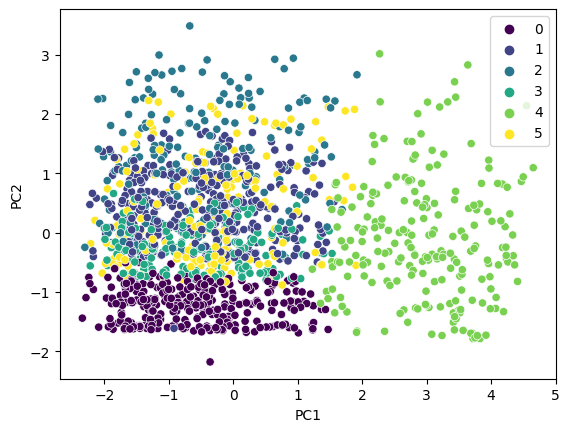

In [63]:
# sobreponha os clusters kmeans (escolha seu modelo k-means favorito da seção anterior)
sns.scatterplot(x='PC1',
                y='PC2',
                data=df_scaled_transformed_v2, hue=kmeans6_v2.labels_, palette='viridis');

In [ ]:
# sobreponha os clusters kmeans (escolha seu modelo k-means favorito da seção anterior)
sns.scatterplot(x='PC1',
                y='PC2',
                data=df_scaled_transformed_v2, hue=kmeans6_v2.labels_, palette='viridis');

## Create a 3D plot

In [64]:
# ajuste um modelo PCA com 3 componentes
pca3_v2 = PCA(n_components=3)
pca3_v2.fit(df_scaled_v2)

PCA(n_components=3)

In [65]:
# veja a razão de variância explicada
pca3_v2.explained_variance_ratio_ # this is higher than before

array([0.33314749, 0.14820879, 0.14519937])

In [66]:
# visualizar as colunas
df_scaled_v2.columns

Index(['idade', 'sexo', 'distancia_casa', 'nivel_cargo', 'salario_mensal',
       'avaliacao_performance', 'satisfacao_trabalho'],
      dtype='object')

Interprete os componentes:
* Componente 1: idade mais avançada, nível de trabalho, renda mensal = mais sênior
* Componente 2: <-- feliz no trabalho | mulheres, deslocamento mais longo, desempenho mais alto -->
* Componente 3: deslocamento mais longo, desempenho mais alto, feliz no trabalho

In [67]:
# transforme os dados
df_scaled_transformed3_v2 = pd.DataFrame(pca3_v2.transform(df_scaled_v2), columns=['PC1', 'PC2', 'PC3'])
df_scaled_transformed3_v2.head()

,PC1,PC2,PC3
0,0.164410,-0.408933,-0.539421
1,0.357646,0.939689,1.067296
2,-1.211455,-1.110661,-0.322666
3,-1.216506,0.156130,-0.948405
4,-1.539477,-0.697076,-0.849305


C:\Users\dsant\AppData\Local\Temp\ipykernel_31324\2523329234.py:14: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


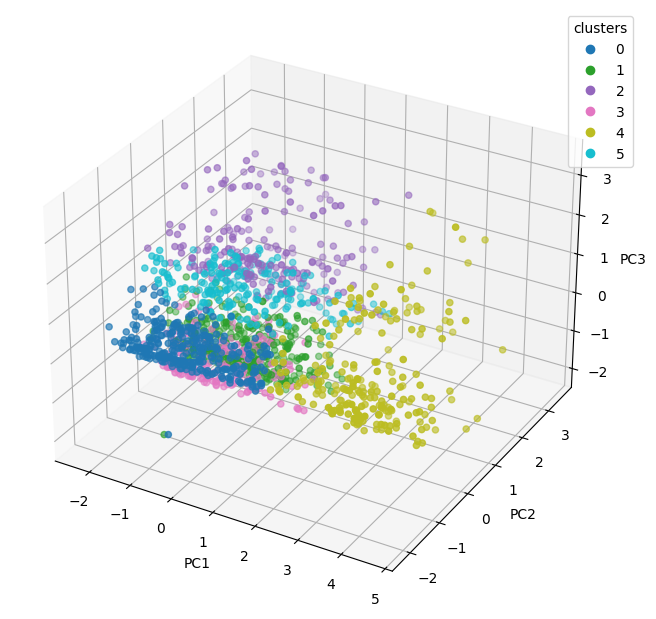

In [68]:
# combinar os dados e os rótulos do cluster
cluster_labels = pd.Series(kmeans6_v2.labels_, name='cluster')

# um dataframe limpo
df_clean = pd.concat([df_scaled_transformed3_v2, cluster_labels], axis=1)

# criar um gráfico de dispersão 3D
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
fig.add_axes(ax)

# os dados e rótulos
sc = ax.scatter(df_clean['PC1'], df_clean['PC2'], df_clean['PC3'],
                c=df_clean['cluster'], cmap='tab10')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# adicione uma legenda
plt.legend(*sc.legend_elements(), title='clusters',
           bbox_to_anchor=(1.05, 1));

## EDA em Clusters
Vamos decidir usar os 6 clusters sem dados de departamento.

In [69]:
# modelo kmeans com 6 clusters
kmeans6_v2

KMeans(n_clusters=6, n_init=10, random_state=42)

In [70]:
# visualizar os rótulos do cluster
kmeans6_v2.labels_

array([1, 2, 0, ..., 1, 0, 2])

## Dataframe com os rótulos e nomes do cluster

In [71]:
clusters = pd.DataFrame(kmeans6_v2.labels_, columns=['Cluster'])
clusters.head()

,Cluster
0,1
1,2
2,0
3,1
4,3


In [72]:
# mapping para os nomes do cluster
cluster_mapping = {0: 'homens que gostam de seus empregos',
                   1: 'mulheres iniciando a carreira',
                   2: 'profissionais de alto desempenho',
                   3: 'homens que não gostam de seus empregos',
                   4: 'funcionários seniores',
                   5: 'pessoas que fazem longos trajetos'}

In [73]:
# rótulos e nomes em um único dataframe
clusters['Cluster_Name'] = clusters['Cluster'].map(cluster_mapping)
clusters.head()

,Cluster,Cluster_Name
0,1,mulheres iniciando a carreira
1,2,profissionais de alto desempenho
2,0,homens que gostam de seus empregos
3,1,mulheres iniciando a carreira
4,3,homens que não gostam de seus empregos


### Visualize as taxas de desligamento para cada cluster

In [74]:
dados_funcionarios.head()

,funcionario_id,idade,sexo,distancia_casa,nivel_cargo,departamento,salario_mensal,avaliacao_performance,satisfacao_trabalho,desligamento
0,501,44,Feminino,1,2,Comercial,6065,3,4,Sim
1,502,52,Masculino,8,2,Produção e Montagem,5202,4,2,Não
2,504,40,Masculino,2,1,Produção e Montagem,2162,3,3,Sim
3,505,36,Feminino,3,1,Produção e Montagem,2981,3,3,Não
4,507,30,Masculino,2,1,Produção e Montagem,3540,3,2,Não


In [75]:

clusters = pd.concat([clusters, data1.desligamento], axis=1)
clusters.head()

,Cluster,Cluster_Name,desligamento
0,1,mulheres iniciando a carreira,1
1,2,profissionais de alto desempenho,0
2,0,homens que gostam de seus empregos,1
3,1,mulheres iniciando a carreira,0
4,3,homens que não gostam de seus empregos,0


In [76]:
# qual é a taxa de atrito para cada cluster?
clusters.groupby(['Cluster_Name'])['desligamento'].mean().sort_values(ascending=False)

Cluster_Name
pessoas que fazem longos trajetos         0.218274
homens que não gostam de seus empregos    0.189055
profissionais de alto desempenho          0.186275
homens que gostam de seus empregos        0.165584
mulheres iniciando a carreira             0.156695
funcionários seniores                     0.073059
Name: desligamento, dtype: float64

Interprete as descobertas:
* Os que se deslocam muito tempo têm mais probabilidade de sair
* Os funcionários seniores têm mais probabilidade de permanecer

In [77]:
# número de funcionários em cada cluster
clusters.Cluster.value_counts()

1    351
0    308
4    219
2    204
3    201
5    197
Name: Cluster, dtype: int64

## Trazendo os Departamentos de Volta para ver os efeitos

In [78]:
# combinar os clusters e os dados do departamento
clusters = pd.concat([clusters, dados_funcionarios.departamento], axis=1)
clusters.head()

,Cluster,Cluster_Name,desligamento,departamento
0,1,mulheres iniciando a carreira,1,Comercial
1,2,profissionais de alto desempenho,0,Produção e Montagem
2,0,homens que gostam de seus empregos,1,Produção e Montagem
3,1,mulheres iniciando a carreira,0,Produção e Montagem
4,3,homens que não gostam de seus empregos,0,Produção e Montagem


In [79]:
# taxa de rotatividade para cada combinação de cluster + departamento?
clusters.groupby(['Cluster_Name', 'departamento']).mean()

Cluster  \
Cluster_Name                           departamento                   
funcionários seniores                  Comercial                4.0   
                                       Produção e Montagem      4.0   
                                       Recursos Humanos         4.0   
homens que gostam de seus empregos     Comercial                0.0   
                                       Produção e Montagem      0.0   
                                       Recursos Humanos         0.0   
                                       TI                       0.0   
homens que não gostam de seus empregos Comercial                3.0   
                                       Produção e Montagem      3.0   
                                       Recursos Humanos         3.0   
mulheres iniciando a carreira          Comercial                1.0   
                                       Produção e Montagem      1.0   
                                       Recursos Humanos         1.0   
                                       TI                       1.0   
pessoas que fazem longos trajetos      Comercial                5.0   
                                       Produção e Montagem      5.0   
                                       Recursos Humanos         5.0   
profissionais de alto desempenho       Comercial                2.0   
                                       Produção e Montagem      2.0   
                                       Recursos Humanos         2.0   
                                       TI                       2.0   

                                                            desligamento  
Cluster_Name                           departamento                       
funcionários seniores                  Comercial                0.125000  
                                       Produção e Montagem      0.059603  
                                       Recursos Humanos         0.000000  
homens que gostam de seus empregos     Comercial                0.191489  
                                       Produção e Montagem      0.152284  
                                       Recursos Humanos         0.071429  
                                       TI                       0.666667  
homens que não gostam de seus empregos Comercial                0.215385  
                                       Produção e Montagem      0.172131  
                                       Recursos Humanos         0.214286  
mulheres iniciando a carreira          Comercial                0.205128  
                                       Produção e Montagem      0.121076  
                                       Recursos Humanos         0.300000  
                                       TI                       1.000000  
pessoas que fazem longos trajetos      Comercial                0.311475  
                                       Produção e Montagem      0.153846  
                                       Recursos Humanos         0.666667  
profissionais de alto desempenho       Comercial                0.181818  
                                       Produção e Montagem      0.187050  
                                       Recursos Humanos         0.111111  
                                       TI                       1.000000

In [82]:
# classificar os valores
clusters.groupby(['Cluster_Name', 'departamento']).mean().sort_values('desligamento', ascending=False)

Cluster  \
Cluster_Name                           departamento                   
profissionais de alto desempenho       TI                       2.0   
mulheres iniciando a carreira          TI                       1.0   
pessoas que fazem longos trajetos      Recursos Humanos         5.0   
homens que gostam de seus empregos     TI                       0.0   
pessoas que fazem longos trajetos      Comercial                5.0   
mulheres iniciando a carreira          Recursos Humanos         1.0   
homens que não gostam de seus empregos Comercial                3.0   
                                       Recursos Humanos         3.0   
mulheres iniciando a carreira          Comercial                1.0   
homens que gostam de seus empregos     Comercial                0.0   
profissionais de alto desempenho       Produção e Montagem      2.0   
                                       Comercial                2.0   
homens que não gostam de seus empregos Produção e Montagem      3.0   
pessoas que fazem longos trajetos      Produção e Montagem      5.0   
homens que gostam de seus empregos     Produção e Montagem      0.0   
funcionários seniores                  Comercial                4.0   
mulheres iniciando a carreira          Produção e Montagem      1.0   
profissionais de alto desempenho       Recursos Humanos         2.0   
homens que gostam de seus empregos     Recursos Humanos         0.0   
funcionários seniores                  Produção e Montagem      4.0   
                                       Recursos Humanos         4.0   

                                                            desligamento  
Cluster_Name                           departamento                       
profissionais de alto desempenho       TI                       1.000000  
mulheres iniciando a carreira          TI                       1.000000  
pessoas que fazem longos trajetos      Recursos Humanos         0.666667  
homens que gostam de seus empregos     TI                       0.666667  
pessoas que fazem longos trajetos      Comercial                0.311475  
mulheres iniciando a carreira          Recursos Humanos         0.300000  
homens que não gostam de seus empregos Comercial                0.215385  
                                       Recursos Humanos         0.214286  
mulheres iniciando a carreira          Comercial                0.205128  
homens que gostam de seus empregos     Comercial                0.191489  
profissionais de alto desempenho       Produção e Montagem      0.187050  
                                       Comercial                0.181818  
homens que não gostam de seus empregos Produção e Montagem      0.172131  
pessoas que fazem longos trajetos      Produção e Montagem      0.153846  
homens que gostam de seus empregos     Produção e Montagem      0.152284  
funcionários seniores                  Comercial                0.125000  
mulheres iniciando a carreira          Produção e Montagem      0.121076  
profissionais de alto desempenho       Recursos Humanos         0.111111  
homens que gostam de seus empregos     Recursos Humanos         0.071429  
funcionários seniores                  Produção e Montagem      0.059603  
                                       Recursos Humanos         0.000000

Interprete as descobertas:
* Os grupos com maior probabilidade de sair são: TI, pessoas com longos deslocamentos, mulheres em RH e aquelas em RH e vendas
* Os grupos com maior probabilidade de NÃO sair são funcionários seniores, homens que gostam de seus empregos e aqueles em pesquisa e desenvolvimento

In [84]:
# número de funcionários em cada combinação de cluster + departamento
clusters.groupby(['Cluster_Name', 'departamento']).count()

Cluster  \
Cluster_Name                           departamento                   
funcionários seniores                  Comercial                 56   
                                       Produção e Montagem      151   
                                       Recursos Humanos          12   
homens que gostam de seus empregos     Comercial                 94   
                                       Produção e Montagem      197   
                                       Recursos Humanos          14   
                                       TI                         3   
homens que não gostam de seus empregos Comercial                 65   
                                       Produção e Montagem      122   
                                       Recursos Humanos          14   
mulheres iniciando a carreira          Comercial                117   
                                       Produção e Montagem      223   
                                       Recursos Humanos          10   
                                       TI                         1   
pessoas que fazem longos trajetos      Comercial                 61   
                                       Produção e Montagem      130   
                                       Recursos Humanos           6   
profissionais de alto desempenho       Comercial                 55   
                                       Produção e Montagem      139   
                                       Recursos Humanos           9   
                                       TI                         1   

                                                            desligamento  
Cluster_Name                           departamento                       
funcionários seniores                  Comercial                      56  
                                       Produção e Montagem           151  
                                       Recursos Humanos               12  
homens que gostam de seus empregos     Comercial                      94  
                                       Produção e Montagem           197  
                                       Recursos Humanos               14  
                                       TI                              3  
homens que não gostam de seus empregos Comercial                      65  
                                       Produção e Montagem           122  
                                       Recursos Humanos               14  
mulheres iniciando a carreira          Comercial                     117  
                                       Produção e Montagem           223  
                                       Recursos Humanos               10  
                                       TI                              1  
pessoas que fazem longos trajetos      Comercial                      61  
                                       Produção e Montagem           130  
                                       Recursos Humanos                6  
profissionais de alto desempenho       Comercial                      55  
                                       Produção e Montagem           139  
                                       Recursos Humanos                9  
                                       TI                              1

## 7. Faça recomendações

In [85]:
# informações de por cluster?
clusters.groupby(['Cluster_Name'])['desligamento'].mean().sort_values(ascending=False)

Cluster_Name
pessoas que fazem longos trajetos         0.218274
homens que não gostam de seus empregos    0.189055
profissionais de alto desempenho          0.186275
homens que gostam de seus empregos        0.165584
mulheres iniciando a carreira             0.156695
funcionários seniores                     0.073059
Name: desligamento, dtype: float64

# Que recomendações você sugeriria para reter funcionários em cada cluster?

Maior rotatividade:
* Pessoas que fazem longos deslocamentos: encontrem opções remotas, criem uma cultura remota mais inclusiva
* Homens que não gostam de seus empregos: peçam para seus gerentes conversarem com eles
* Pessoas com melhor desempenho: encontrem oportunidades para cargos mais seniores

Menor rotatividade:

* Funcionários seniores: isso faz sentido que eles tenham menos rotatividade, já que estão na empresa há muito tempo
* Funcionárias: essa é uma descoberta interessante, investigue mais sobre o porquê disso
* Homens que gostam de seus empregos: isso faz sentido que as pessoas que gostam de seus empregos permaneçam